In [17]:
# cs5785
# HW1
# Q1

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import bisect
from ipywidgets import interact
from scipy.spatial import distance
from sklearn import datasets, cross_validation, svm, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

train = pd.read_csv("train.csv").values
test = pd.read_csv("test.csv").values

<function __main__.show_image_train>

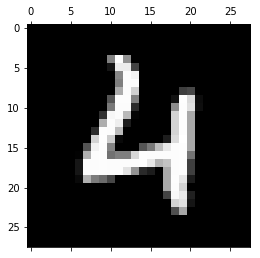

In [2]:
#(b)
def show_image_train(n):
	plt.matshow(train[n, 1:].reshape(28, 28), cmap = 'gray')
interact(show_image_train, n=(0,41999))

<function __main__.show_image_test>

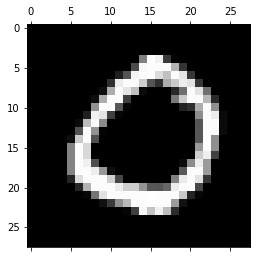

In [3]:
def show_image_test(n):
	plt.matshow(test[n].reshape(28, 28), cmap = 'gray')
interact(show_image_test, n=(0,27999))

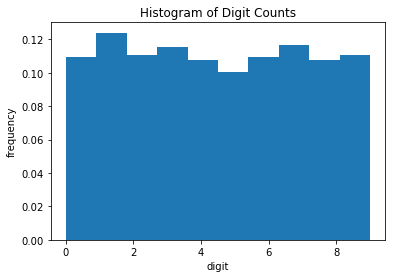

In [16]:
#(c)
plt.hist(train[:, 0], bins = 10, normed = True)
plt.xlabel("digit")
plt.ylabel("frequency")
plt.title("Histogram of Digit Counts")

In [ ]:
#(d)
dist_matrix = distance.cdist(train[:, 1:], train[:, 1:])
np.save("/Desktop/dist_matrix.npy", dist_matrix)

In [5]:
dists = np.load("/Desktop/dist_matrix.npy")

(42000, 42000)

array([8, 6, 2, 0, 2, 3, 6, 9, 9, 7])

0 0
1 1
2 2
3 5
4 4
5 5
6 6
7 7
8 8
9 9


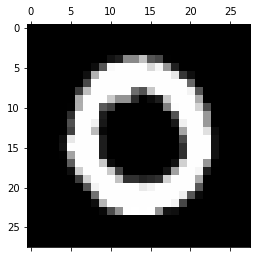

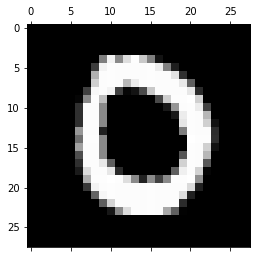

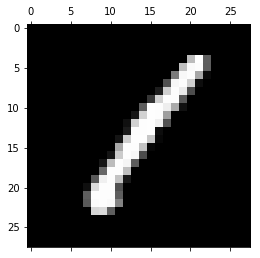

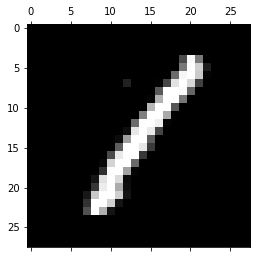

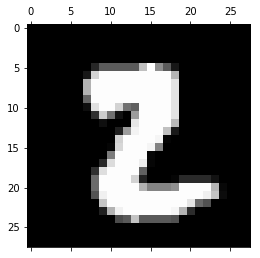

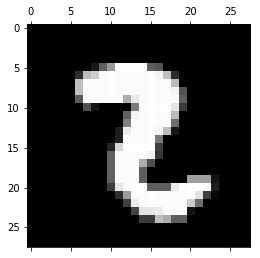

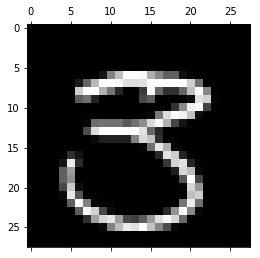

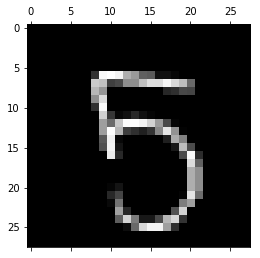

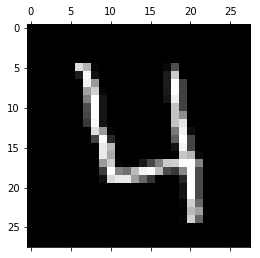

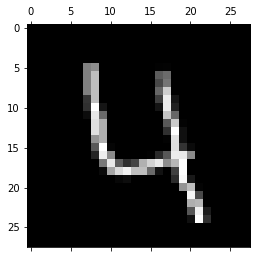

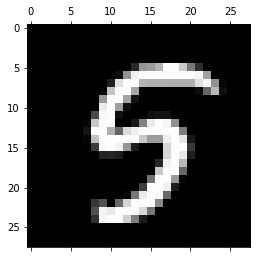

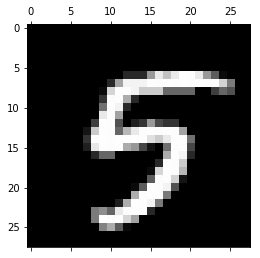

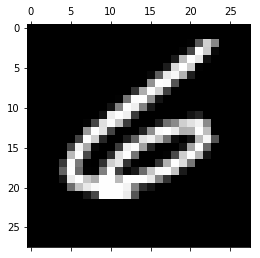

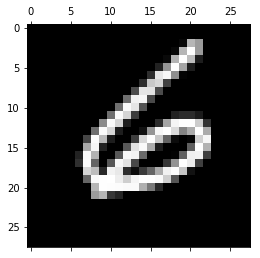

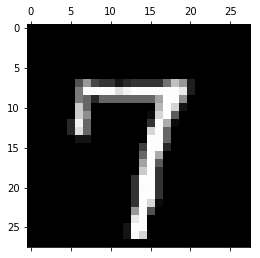

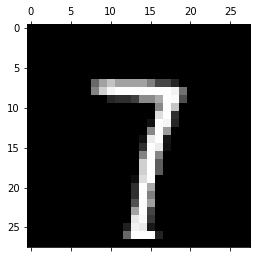

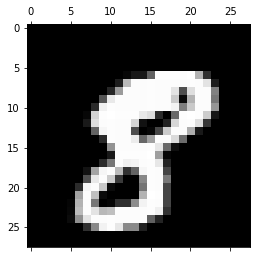

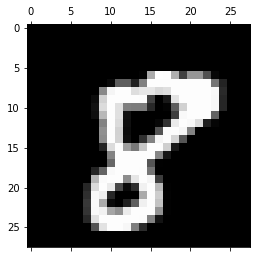

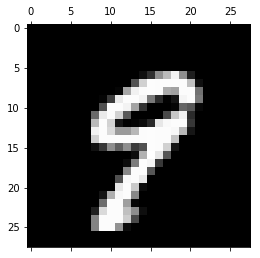

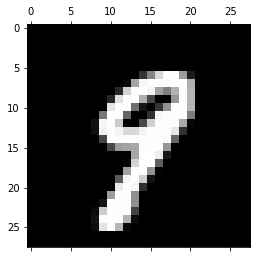

In [28]:
ind = [1, 0, 16, 7, 3, 8, 21, 6, 10, 11]
for c in ind:
    match_ix = np.argsort(dists[c])[1]
    print(train[c, 0], train[match_ix, 0])
    plt.matshow(train[c, 1:].reshape(28, 28), cmap = 'gray')
    plt.matshow(train[match_ix, 1:].reshape(28, 28), cmap = 'gray')


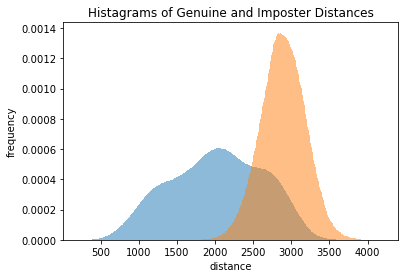

In [15]:
#(e)
binary = train[np.where(train[:, 0] < 2)]
zeros = binary[np.where(binary[:, 0] == 0)]
ones = binary[np.where(binary[:, 0] == 1)]

genuine = np.append(distance.pdist(zeros), distance.pdist(ones))
impostor = distance.cdist(zeros, ones).flatten()

plt.hist(genuine, bins = 300, normed = True, alpha = 0.5)
plt.hist(impostor, bins = 300, normed = True, alpha = 0.5)
plt.xlabel("distance")
plt.ylabel("frequency")
plt.title("Histagrams of Genuine and Imposter Distances")

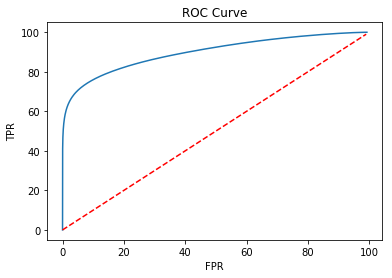

In [11]:
#(f)
fpr = []
tpr = []
genuine.sort()
impostor.sort()

max_dist = max(genuine[len(genuine) - 1], impostor[len(impostor) - 1])

for i in range(0, int(max_dist), 1):
    fpr.append(100.0 * bisect.bisect_left(impostor, i)/float(len(genuine)))
    tpr.append(100.0 * bisect.bisect_left(genuine, i)/float(len(genuine)))

diag = np.arange(max(fpr[len(fpr) - 1], tpr[len(tpr) - 1]))

plt.plot(fpr, tpr)
plt.plot(diag, diag, '--r')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [12]:
#(g)
def kNN(k, Xtrain, Ytrain, Xtest):
	Ytest = []
	for i in range(len(Xtest)):
		print(i)

		Ytest.append(predict(k, Xtrain, Ytrain, Xtest[i, :]))
	return Ytest

def predict(k, Xtrain, Ytrain, Xtest): # Xtest gets passed in one data at a time
	dist = distance.cdist(Xtrain, Xtest.reshape(1, len(Xtest)))
	index = np.argsort(dist.flatten())[:k] # 1-dimensional array
	return mode(Ytrain[index])

def mode(arr):
	return collections.Counter(arr).most_common(1)[0][0]

In [ ]:
#(h)
def my_cross_val(method, X, y, k):
    subset_size = len(y) // 3
    acc_rates = np.zeros(3)
    y_actual = []
    y_pred = []
    for i in range(3):
    	print("Round", i)
    	X_train = np.concatenate((X[:i * subset_size],X[(i + 1) * subset_size:]), axis = 0)
    	X_test = X[i * subset_size:][:subset_size]
    	y_train = np.concatenate((y[:i * subset_size] , y[(i + 1) * subset_size:]), axis = 0)
    	y_test = y[i * subset_size:][:subset_size]
    	result = method(k, X_train, y_train, X_test)
    	y_pred = np.append(y_pred, result)
    	y_actual = np.append(y_actual, y_test)
    	mm = 0
    	for j in range(len(result)):
    		if result[j] != y_test[j]:
    			mm = mm + 1
    	acc = 1 - float(mm)/float(len(result))
    	acc_rates[i] = acc
    np.save("/Desktop/y_actual.npy", y_actual)
    np.save("/Desktop/y_pred.npy", y_pred)
    return print(acc_rates, "mean:",np.mean(error_rates), "standard deviation:", np.std(error_rates))

my_cross_val(kNN, train[:, 1:], train[:, 0], 3)

In [19]:
#(i)
y_true = np.load("/Desktop/y_actual.npy")
y_pred = np.load("/Desktop/y_pred.npy")
confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[4105,    0,    4,    0,    0,    6,   13,    0,    2,    2],
       [   0, 4651,    8,    2,    4,    2,    5,    8,    2,    2],
       [  29,   41, 3988,   15,    3,    3,    7,   76,   10,    5],
       [   2,    9,   29, 4195,    0,   44,    2,   25,   26,   19],
       [   2,   42,    0,    0, 3895,    0,   16,    7,    1,  109],
       [  11,    2,    1,   62,    3, 3629,   46,    4,    9,   28],
       [  19,    5,    0,    0,    6,   22, 4083,    0,    2,    0],
       [   1,   53,    8,    2,   11,    0,    0, 4272,    0,   54],
       [  12,   46,   14,   57,   14,   78,   20,   10, 3762,   50],
       [  12,    9,    3,   29,   39,   11,    2,   61,   12, 4010]])

In [ ]:
#(j)
Ytest = kNN(3, train[:, 1:], train[:, 0], test)
np.save("/Desktop/y_final.npy", Ytest)

In [22]:
final = pd.Series(np.load("/Desktop/y_final.npy"))
index = pd.Series(np.arange(1, 28001, 1))
df = pd.DataFrame(index, columns = ["ImageId"])
df["Label"] = final
df.to_csv("/Desktop/Digit.csv", index = False)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
